<a href="https://colab.research.google.com/github/MamouneElBoukfaoui/index.html/blob/main/A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dear recruiters, please find below a simulated A/B test. Using my background in Bayesian statistics, I carried out a Bayesian A/B testing as an alternative to traditional hypothesis testing. One of the advantages of this approach is its probability-based intepretation allowing more informed business decisions.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Simulate A/B Test Data
Here we use synthetic data as an a example for carrying out the A/B test:

In [2]:
def simulate_ab_test_data(n=1000):
    np.random.seed(42)
    data = {
        'user_id': np.arange(n),
        'group': np.random.choice(['control', 'variant'], n),
        'collaboration_score': np.random.normal(70, 10, n) + np.random.choice([0, 5], n),
        'engagement_score': np.random.normal(60, 15, n) + np.random.choice([0, 7], n)
    }
    return pd.DataFrame(data)

ab_test_df = simulate_ab_test_data()
ab_test_df

,user_id,group,collaboration_score,engagement_score
0,0,control,78.417560,45.905238
1,1,variant,88.761708,58.753416
2,2,control,79.504238,44.429194
3,3,control,64.230963,71.400839
4,4,control,66.015853,68.236596
...,...,...,...,...
995,995,control,65.120886,55.726868
996,996,control,96.573082,63.157304
997,997,variant,63.942851,56.377538
998,998,variant,82.420954,59.073537


# Analyze A/B Test Results

In [3]:
control_group = ab_test_df[ab_test_df['group'] == 'control']
variant_group = ab_test_df[ab_test_df['group'] == 'variant']

# T-Test for Collaboration Score
t_stat_collab, p_value_collab = stats.ttest_ind(control_group['collaboration_score'], variant_group['collaboration_score'])

# T-Test for Engagement Score
t_stat_engage, p_value_engage = stats.ttest_ind(control_group['engagement_score'], variant_group['engagement_score'])


# Bayesian A/B testing

In [4]:
def bayesian_ab_test(control, variant, n_simulations=10000):
    posterior_samples = np.random.normal(variant.mean(), variant.std(), n_simulations) - np.random.normal(control.mean(), control.std(), n_simulations)
    return posterior_samples

bayesian_results_collab = bayesian_ab_test(control_group['collaboration_score'], variant_group['collaboration_score'])
bayesian_results_engage = bayesian_ab_test(control_group['engagement_score'], variant_group['engagement_score'])


# Visualization and Reporting

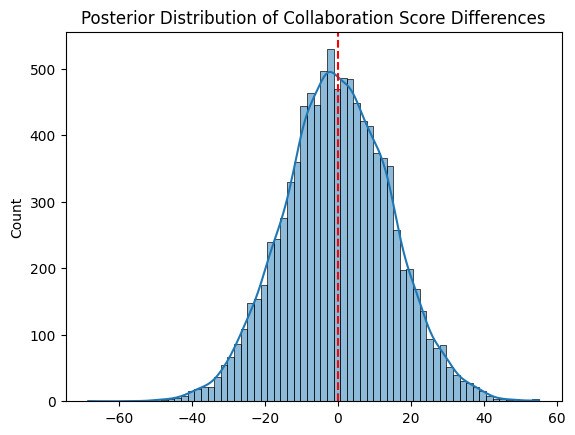

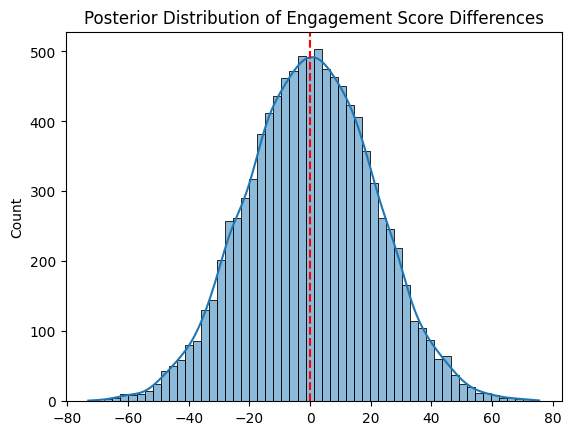

A/B Test Results:
Collaboration Score - t-statistic: -0.08921415291505622, p-value: 0.9289296174221147
Engagement Score - t-statistic: -0.4757017151403769, p-value: 0.6343910043181924
The new feature does not have a statistically significant impact on collaboration scores.
The new feature does not have a statistically significant impact on engagement scores.
Bayesian A/B Test - Probability that the new feature improves collaboration: 49.21%
Bayesian A/B Test - Probability that the new feature improves engagement: 50.60%


In [5]:
sns.histplot(bayesian_results_collab, kde=True)
plt.title('Posterior Distribution of Collaboration Score Differences')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

sns.histplot(bayesian_results_engage, kde=True)
plt.title('Posterior Distribution of Engagement Score Differences')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

print("A/B Test Results:")
print(f"Collaboration Score - t-statistic: {t_stat_collab}, p-value: {p_value_collab}")
print(f"Engagement Score - t-statistic: {t_stat_engage}, p-value: {p_value_engage}")

if p_value_collab < 0.05:
    print("The new feature has a statistically significant impact on collaboration scores.")
else:
    print("The new feature does not have a statistically significant impact on collaboration scores.")

if p_value_engage < 0.05:
    print("The new feature has a statistically significant impact on engagement scores.")
else:
    print("The new feature does not have a statistically significant impact on engagement scores.")

# Bayesian Interpretation
prob_collab_impact = (bayesian_results_collab > 0).mean()
prob_engage_impact = (bayesian_results_engage > 0).mean()

print(f"Bayesian A/B Test - Probability that the new feature improves collaboration: {prob_collab_impact:.2%}")
print(f"Bayesian A/B Test - Probability that the new feature improves engagement: {prob_engage_impact:.2%}")